### Importando bibliotecas

In [122]:
import numpy as np
import matplotlib.colors as cl
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
from ipywidgets import interact, FloatRangeSlider
import ipywidgets as widgets

from glob import glob
import librosa
import librosa.display
import IPython.display as ipd

### 1. Lendo arquivo de audio

In [22]:
# Reads .wav file and returns the sample rate and the data
y_agudo, sr_agudo = librosa.load('agudo.wav')
y_grave, sr_grave = librosa.load('grave.wav')

In [23]:
# Calcula a duração do audio em segundos
duracao_agudo = y_agudo.shape[0]/sr_agudo
duracao_grave = y_grave.shape[0]/sr_grave

In [28]:
# Vetor correspondente aos instantes de tempo
tempo_agudo = np.linspace(0., duracao_agudo, y_agudo.shape[0])
tempo_grave = np.linspace(0., duracao_grave, y_grave.shape[0])

### 2. Exibe gráfico do sinal de audio no tempo

In [ ]:
# Cria os valores para o eixo x (tempo)
t_values = [t for t in np.arange(0,20)]
t_ticks = [str(t) for t in t_values]

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12, 4),sharex=True,sharey=True)

ax1.plot(tempo_agudo, y_agudo,color='tab:blue',label='Sinal agudo')
ax1.grid(True, alpha=0.4,ls='--')
ax1.legend()
ax1.minorticks_on()

ax2.plot(tempo_grave, y_grave, color='tab:red',label='Sinal grave')
ax2.set_xlabel('Tempo [s]', loc='right')
ax2.legend()
ax2.grid(True, alpha=0.4,ls='--')

plt.show()

### 3. Aparando a região de silêncio

In [40]:
y_agudo_aparado, _ = librosa.effects.trim(y_agudo,top_db=20)
y_grave_aparado, _ = librosa.effects.trim(y_grave,top_db=20)

In [43]:
# Calcula a duração do audio em segundos
duracao_agudo_aparado = y_agudo_aparado.shape[0]/sr_agudo
duracao_grave_aparado = y_grave_aparado.shape[0]/sr_grave

In [45]:
# Vetor correspondente aos instantes de tempo
tempo_agudo_aparado = np.linspace(0., duracao_agudo_aparado, y_agudo_aparado.shape[0])
tempo_grave_aparado = np.linspace(0., duracao_grave_aparado, y_grave_aparado.shape[0])

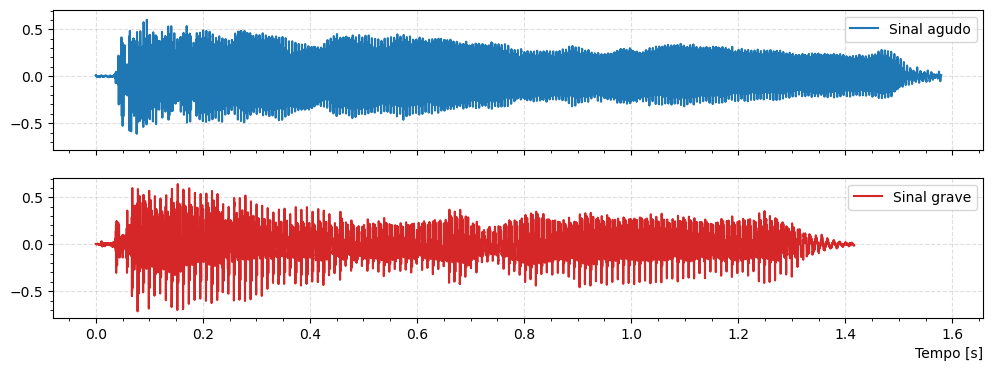

In [46]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12, 4),sharex=True,sharey=True)

ax1.plot(tempo_agudo_aparado, y_agudo_aparado,color='tab:blue',label='Sinal agudo')
ax1.grid(True, alpha=0.4,ls='--')
ax1.legend()
ax1.minorticks_on()

ax2.plot(tempo_grave_aparado, y_grave_aparado, color='tab:red',label='Sinal grave')
ax2.set_xlabel('Tempo [s]', loc='right')
ax2.legend()
ax2.grid(True, alpha=0.4,ls='--')

plt.show()

### 4. Zoom em parcelas do sinal

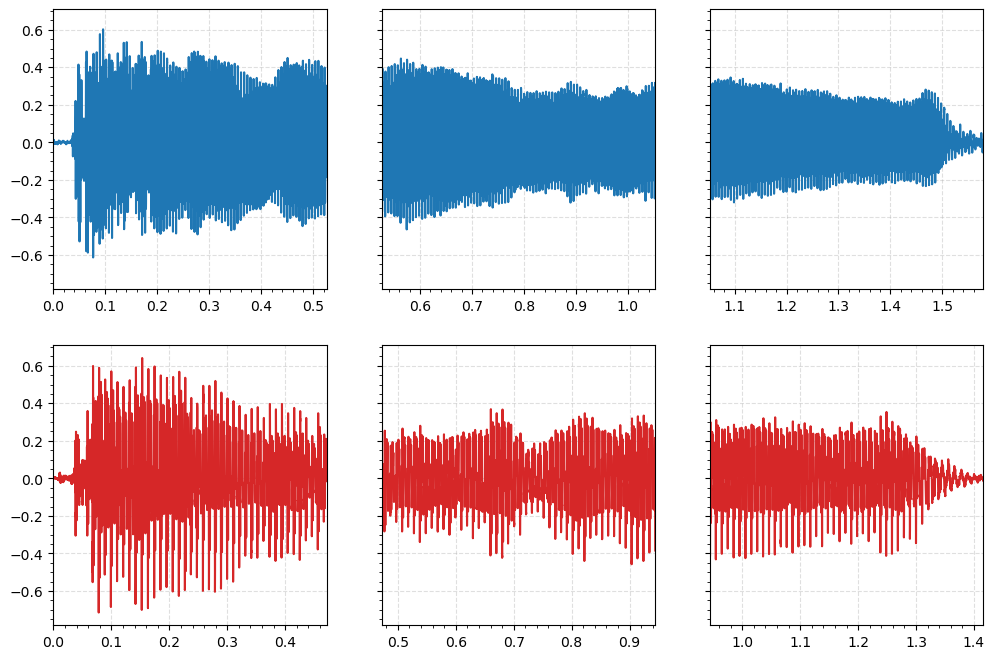

In [78]:
fig, axs = plt.subplots(2,3,figsize=(12, 8), sharey=True)

# for ax in axs.flat:
for i,ax in enumerate(axs[0]):
    ax.set_xlim((i/3)*max(tempo_agudo_aparado),(i+1)*max(tempo_agudo_aparado)/3)
    ax.plot(tempo_agudo_aparado, y_agudo_aparado,color='tab:blue',label='Sinal agudo')
    ax.grid(True, alpha=0.4, ls='--')
    ax.minorticks_on()

for i,ax in enumerate(axs[1]):
    ax.set_xlim((i/3)*max(tempo_grave_aparado),(i+1)*max(tempo_grave_aparado)/3)
    ax.plot(tempo_grave_aparado, y_grave_aparado,color='tab:red',label='Sinal grave')
    ax.grid(True, alpha=0.4, ls='--')
    ax.minorticks_on()

plt.show()

### 5. Sinal no dominio da frequência

In [ ]:
# Perform Fourier Transform
fft = np.fft.fft(y_agudo_aparado), np.fft.fft(y_grave_aparado)

In [ ]:
# Calculate frequencies
freqs = np.fft.fftfreq(len(fft_agudo), 1 / sr_agudo), np.fft.fftfreq(len(fft_grave), 1 / sr_grave)

In [107]:
# Take the absolute value to get the magnitude spectrum
mag = np.abs(fft_agudo), np.abs(fft_grave)

In [128]:
cores = {0: 'tab:blue', 1: 'tab:red'}
legenda = {0: 'Sinal agudo', 1: 'Sinal grave'}

In [159]:
def update_plot(x_range):

    fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True, sharey=True)
    for i, ax in enumerate(axs):
        ax.plot(freqs[i][:len(freqs[i]) // 2], mag[i][:len(freqs[i]) // 2], lw=1, color=cores[i], label=legenda[i])
        ax.minorticks_on()
        ax.legend()
        ax.set_xlim(x_range)
        ax.grid(True, alpha=0.3, ls='--')

In [160]:
x_range_slider = FloatRangeSlider(
    value=[0, 2000],  # Initial range
    min=0,         # Minimum value
    max=2000,         # Maximum value
    step=100,        # Step size
    description='Frequencies:',
    orientation='horizontal',
    continuous_update=False,
    layout={'width': '100%'}
)
        
interact(update_plot, x_range=x_range_slider)

interactive(children=(FloatRangeSlider(value=(0.0, 2000.0), continuous_update=False, description='Frequencies:…

<function __main__.update_plot(x_range)>

In [152]:
def update_plot(x_range):
    fig = plt.figure(figsize=(12, 6))
    ax = plt.subplot()
    ax.plot(freqs[0][:len(freqs[0])//2], mag[0][:len(freqs[0])//2],lw=.5,color=cores[0], label=legenda[0])
    ax.plot(freqs[1][:len(freqs[1])//2], mag[1][:len(freqs[1])//2],lw=.5,color=cores[1], label=legenda[1], alpha=0.8, ls='--')
    ax.fill_between(freqs[0][:len(freqs[0]) // 2], mag[0][:len(freqs[0]) // 2], y2=0,color=cores[0], alpha=0.3)
    ax.fill_between(freqs[1][:len(freqs[1]) // 2], mag[1][:len(freqs[1]) // 2], y2=0,color=cores[1], alpha=0.3)
    ax.set_xlim(x_range)
    ax.minorticks_on()
    ax.legend()
    ax.set_xlabel('Frequencia [Hz]')
    ax.grid(True,alpha=0.3,ls='--')

In [ ]:
x_range_slider = FloatRangeSlider(
    value=[0, 2000],  # Initial range
    min=0,         # Minimum value
    max=2000,         # Maximum value
    step=100,        # Step size
    description='Frequencies:',
    orientation='horizontal',
    continuous_update=False,
    layout={'width': '100%'}
)

In [157]:
interact(update_plot, x_range=x_range_slider)

interactive(children=(FloatRangeSlider(value=(0.0, 2000.0), continuous_update=False, description='Frequencies:…

<function __main__.update_plot(x_range)>

## 3. Espectrograma

```python
frequencies, times, spectrogram_data = spectrogram(y, fs=sr)
```

In [169]:
spec_agudo, spec_grave = spectrogram(y_agudo_aparado, fs=sr_agudo), spectrogram(y_grave_aparado, fs=sr_grave)

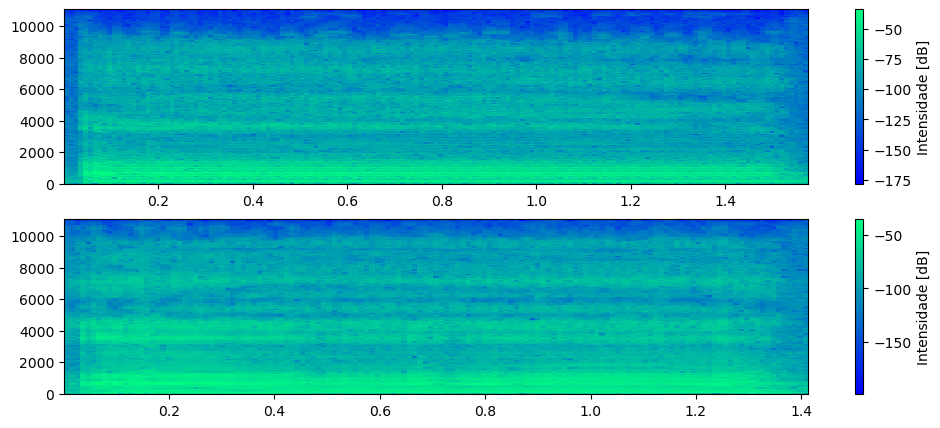

In [182]:
# Plot the spectrogram
fig, axs = plt.subplots(2,1,figsize=(12, 5))

pcm1 = axs[0].pcolormesh(spec_agudo[1], spec_agudo[0], 10 * np.log10(spec_agudo[2]), shading='auto', cmap='winter')
pcm2 = axs[1].pcolormesh(spec_grave[1], spec_grave[0], 10 * np.log10(spec_grave[2]), shading='auto', cmap='winter')

cbar1 = fig.colorbar(pcm1, ax=axs[0], label='Intensidade [dB]', cmap='winter')
cbar2 = fig.colorbar(pcm2, ax=axs[1], label='Intensidade [dB]', cmap='winter')

plt.show()

In [186]:
# Assuming you have an array of time series amplitudes called 'signal'
# For example:
# signal = np.random.uniform(-1, 1, 44100)  # 44100 samples for 1 second of audio, random signal for demonstration

# Define the parameters for the .wav file
# sample_rate = 44100
sample_rate = 30000
duration = len(y_agudo) / sample_rate  # Duration of the audio in seconds

# Convert the signal to the appropriate data type for writing to .wav
signal = np.int16(y_agudo * 32767)  # Convert to 16-bit integer, which is the format used in .wav files

# Write the signal to a .wav file
wavfile.write('output.wav', sample_rate, signal)